In [1]:
import pandas as pd
import os
import json
import warnings
from sharedcontrolpaper.force_sensitive_stopping_task_utils import plot_figure_s1, plot_figure_s2, plot_figure_s3, plot_figure_s4, plot_figure_s5, convert_formats_back, numeric_sort_key

## Load data from JSON files

In [3]:
with open('force_sensitive_data.json', 'r') as f:
    loaded_data = json.load(f)

non_ai_proportion_ones = pd.DataFrame.from_records(loaded_data['non_ai_proportion_ones'])
ai_failed_proportion_ones = pd.DataFrame.from_records(loaded_data['ai_failed_proportion_ones'])
ai_assisted_proportion_ones = pd.DataFrame.from_records(loaded_data['ai_assisted_proportion_ones'])

ordered_columns = sorted(non_ai_proportion_ones.columns, key=numeric_sort_key)
non_ai_proportion_ones, ai_failed_proportion_ones, ai_assisted_proportion_ones = (non_ai_proportion_ones[ordered_columns], 
                                                                                  ai_assisted_proportion_ones[ordered_columns], 
                                                                                  ai_failed_proportion_ones[ordered_columns])

shared_control_metrics = convert_formats_back(loaded_data['shared_control_metrics'])

with open('simple_stop_data.json', 'r') as f:
    loaded_data = json.load(f)

final_aggregated_results = pd.DataFrame.from_records(loaded_data['final_aggregated_results'])

with open('ai_survey_data.json', 'r') as f:
    loaded_data = json.load(f)

survey_scores = convert_formats_back(loaded_data['survey_scores'])
survey_results = convert_formats_back(loaded_data['survey_results'])


In [4]:
parent_directory = os.path.dirname(os.getcwd())

## Supplemental Figure 1

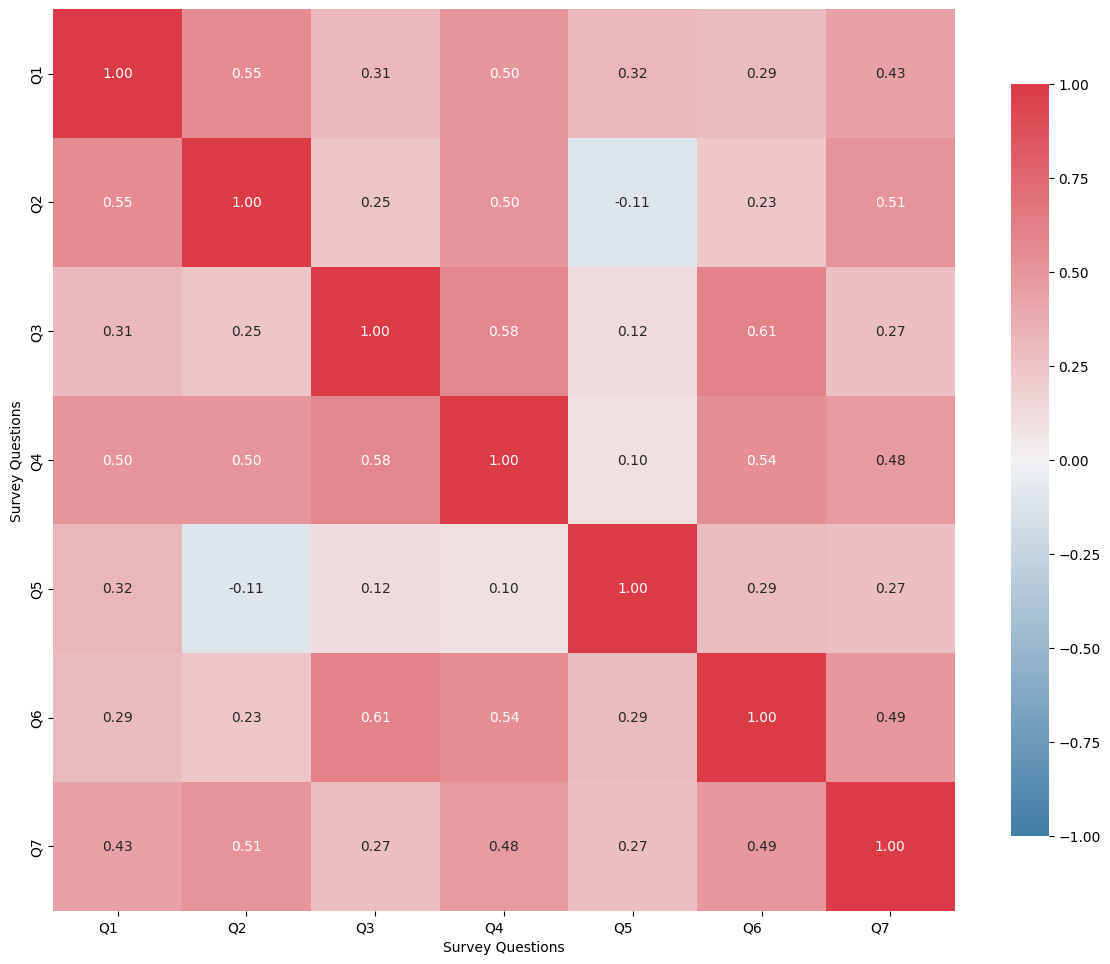

In [5]:
plot_figure_s1(survey_results, f'{parent_directory}/figures/figureS1.png')

## Supplemental Figure 2

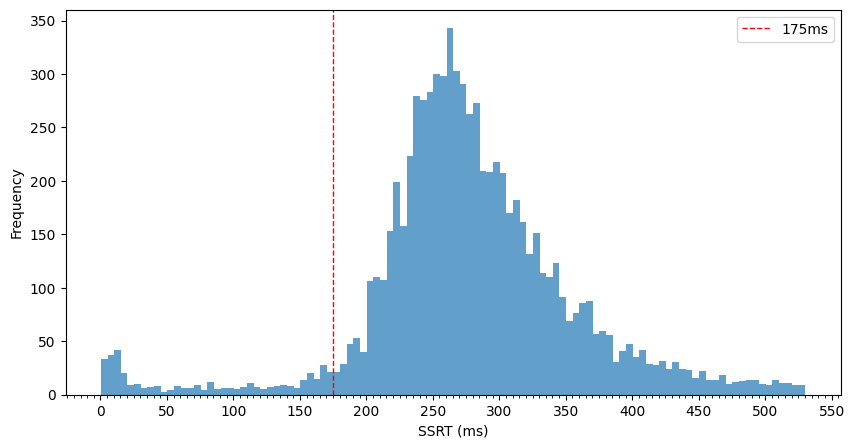

In [6]:
plot_figure_s2(shared_control_metrics, f'{parent_directory}/figures/figureS2.png')

## Supplemental Figure 3: Proportion of full pressure (pressure = 1)  timepoints at each time interval until stop onset.

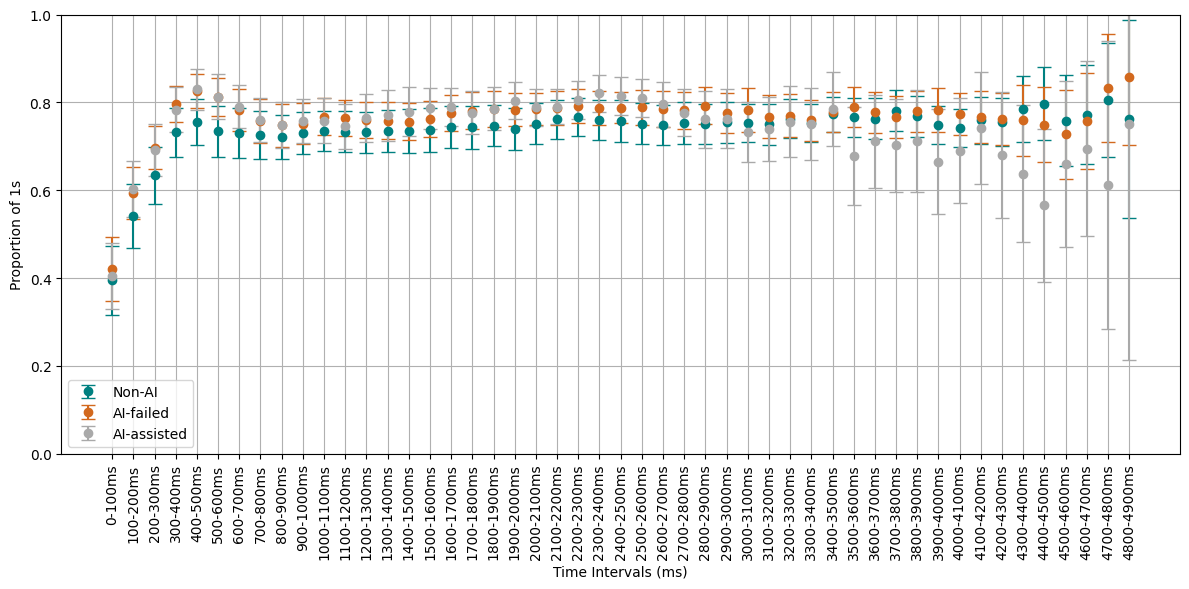

In [7]:
dataframes = [non_ai_proportion_ones, ai_failed_proportion_ones, ai_assisted_proportion_ones]
labels = ['Non-AI', 'AI-failed', 'AI-assisted']
colors = ['teal', 'chocolate', 'darkgray']

plot_figure_s3(dataframes, labels, colors, f'{parent_directory}/figures/figureS3.png')

## Supplemental Figure 4

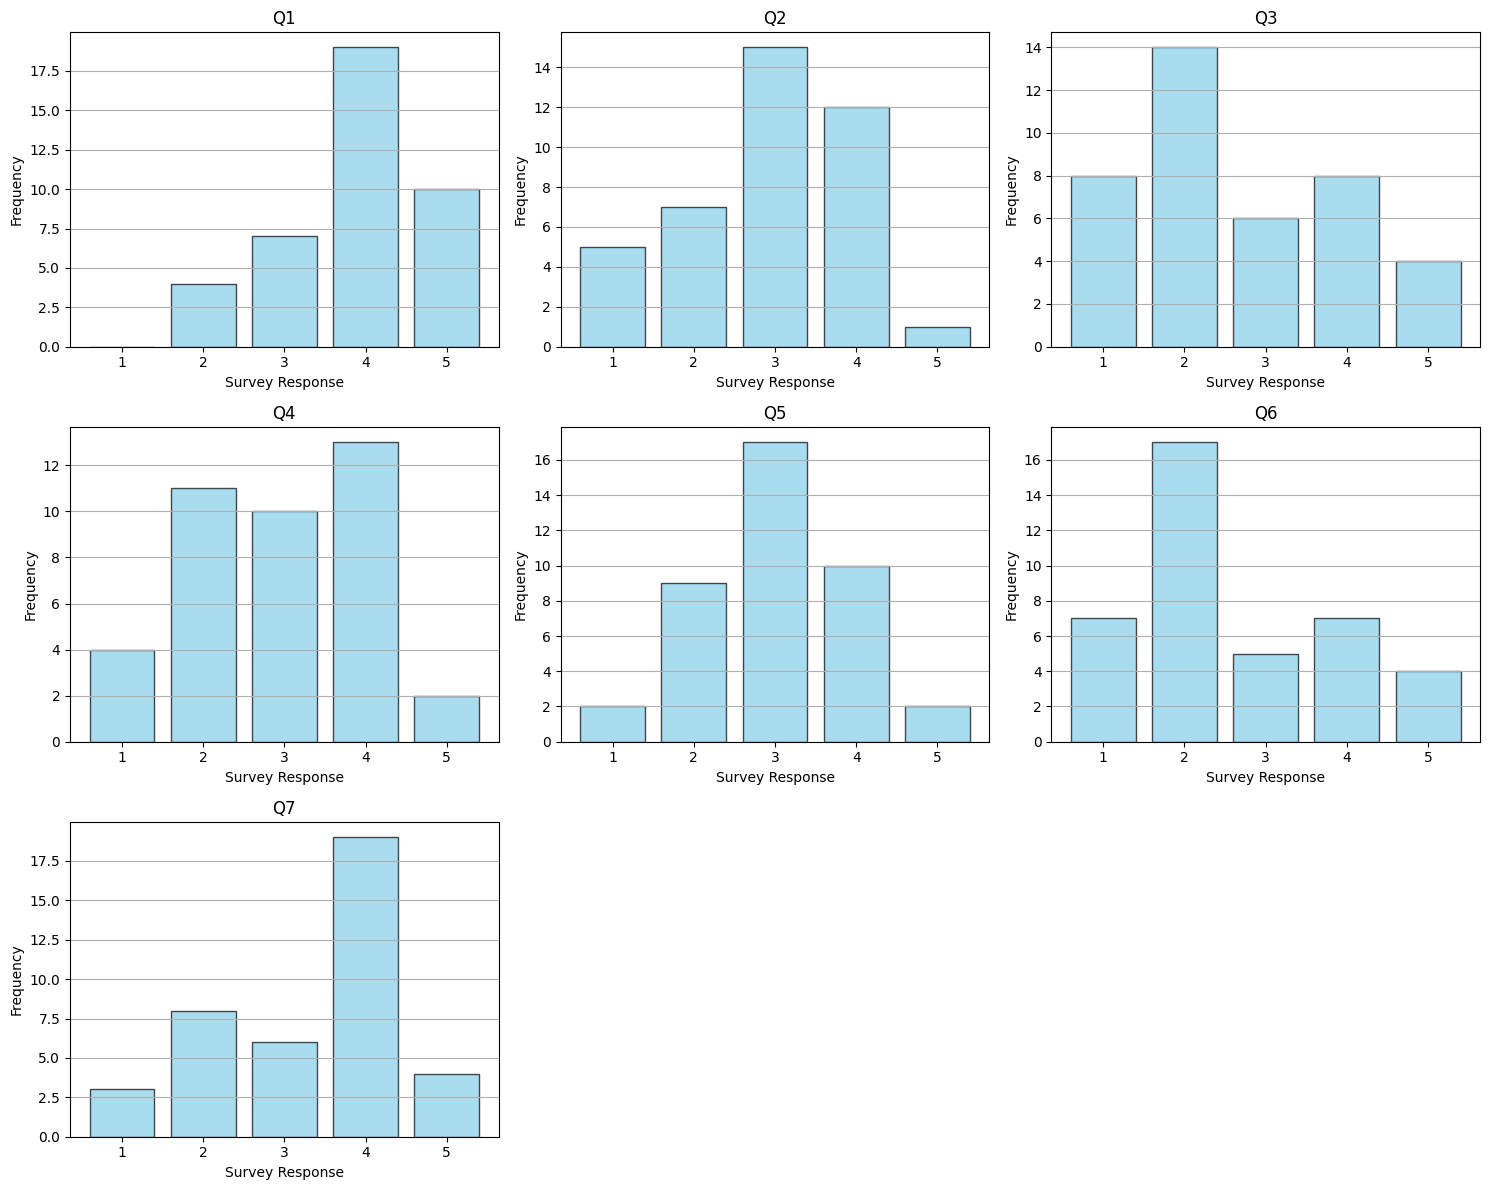

In [8]:
plot_figure_s4(survey_scores, f'{parent_directory}/figures/figureS4.png')

## Supplemental Figure 5

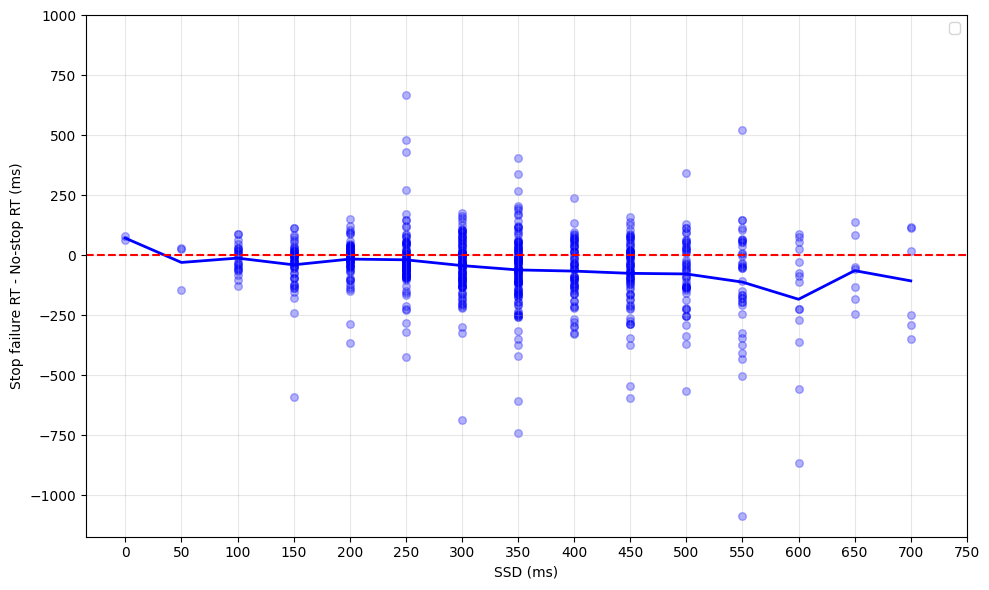

In [9]:
plot_figure_s5(final_aggregated_results, f'{parent_directory}/figures/figureS5.png')